# Credit Card Fraud Detection Project

This project focuses on developing binary classification models to detect fraudulent credit card transactions. The analysis is structured in the following sections:

1. Exploratory Data Analysis (EDA) - Understanding patterns and relationships in transaction data
2. Model Implementation:
   - Logistic Regression
   - K-Nearest Neighbors
   - Support Vector Machine (SVM) 
3. Feature Reduction Analysis - Comparing model performance before and after dimensionality reduction

The goal is to identify the most effective approach for detecting fraudulent transactions while maintaining high accuracy and minimizing false positives.



In [2]:
import numpy as np
import pandas as pd

## Exploratory Data Analysis (EDA)



This exploratory data analysis aims to understand the characteristics of the fraud detection dataset. By analyzing various aspects of the data, we can uncover patterns and insights that will aid in building an effective predictive model to identify fraudulent transactions.


## Data Overview

- **Dataset:** `fraud_test.csv`
- **Number of Records:** 93,34 (as indicated by the output)
- **Number of Features:** 22
- **Some of the Features Description:**
  - `trans_date_trans_time`: Date and time of the transaction.
  - `cc_num`: Credit card number.
  - `merchant`: Merchant name where the transaction took place.
  - `category`: Category of the merchant.
  - `am`: Amount of the transaction.
  - `state`: State where the transaction occurred.
  - `zip`: ZIP code of the transaction location.
  - `lat`: Latitude of the merchant location.
  - `long`: Longitude of the merchant location.
  - `job`: Job title of the cardholder.
  - `dob`: Date of birth of the cardholder.
  - `trans_num`: Transaction number.
  - `unix_time`: Unix timestamp of the transaction.
  - `merch_lat`: Merchant latitude.
  - `merch_long`: Merchant longitude.
  - `is_fraud`: Target variable indicating fraudulent transactions.


In [3]:
data = pd.read_csv("data/fraud_test.csv")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# data = pd.read_csv("path_to_your_data.csv")

# Preprocessing: Convert date/time columns to numerical format or drop them
for column in data.columns:
    # Check if column is datetime-like
    if pd.api.types.is_datetime64_any_dtype(data[column]):
        data[column] = data[column].astype(int)  # Convert datetime to numerical (timestamp)
    elif pd.api.types.is_object_dtype(data[column]):
        # Encode categorical text columns
        encoder = LabelEncoder()
        data[column] = encoder.fit_transform(data[column])

# Check for missing values and handle them
data = data.fillna(0)










In [5]:
# Overview of the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  int64  
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  int64  
 3   category               555719 non-null  int64  
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  int64  
 6   last                   555719 non-null  int64  
 7   gender                 555719 non-null  int64  
 8   street                 555719 non-null  int64  
 9   city                   555719 non-null  int64  
 10  state                  555719 non-null  int64  
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [6]:
print(data.isnull().sum())


trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


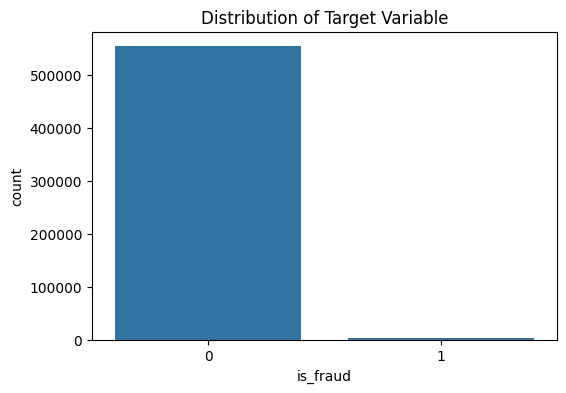

Number of fraudulent transactions (is_fraud = 1): 2145
Number of non-fraudulent transactions (is_fraud = 0): 553574


In [7]:
# Visualization 1: Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=data)  # Assuming the target column is named 'target'
plt.title('Distribution of Target Variable')
plt.show()
print("Number of fraudulent transactions (is_fraud = 1):", data['is_fraud'].value_counts().get(1, 0))
print("Number of non-fraudulent transactions (is_fraud = 0):", data['is_fraud'].value_counts().get(0, 0))



In [8]:
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', None)
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print("Count of non-fraudulent transactions (is_fraud = 0):", y_train.value_counts().get(0, 0))
print("Count of fraudulent transactions (is_fraud = 1):", y_train.value_counts().get(1, 0))



Count of non-fraudulent transactions (is_fraud = 0): 470538
Count of fraudulent transactions (is_fraud = 1): 1823


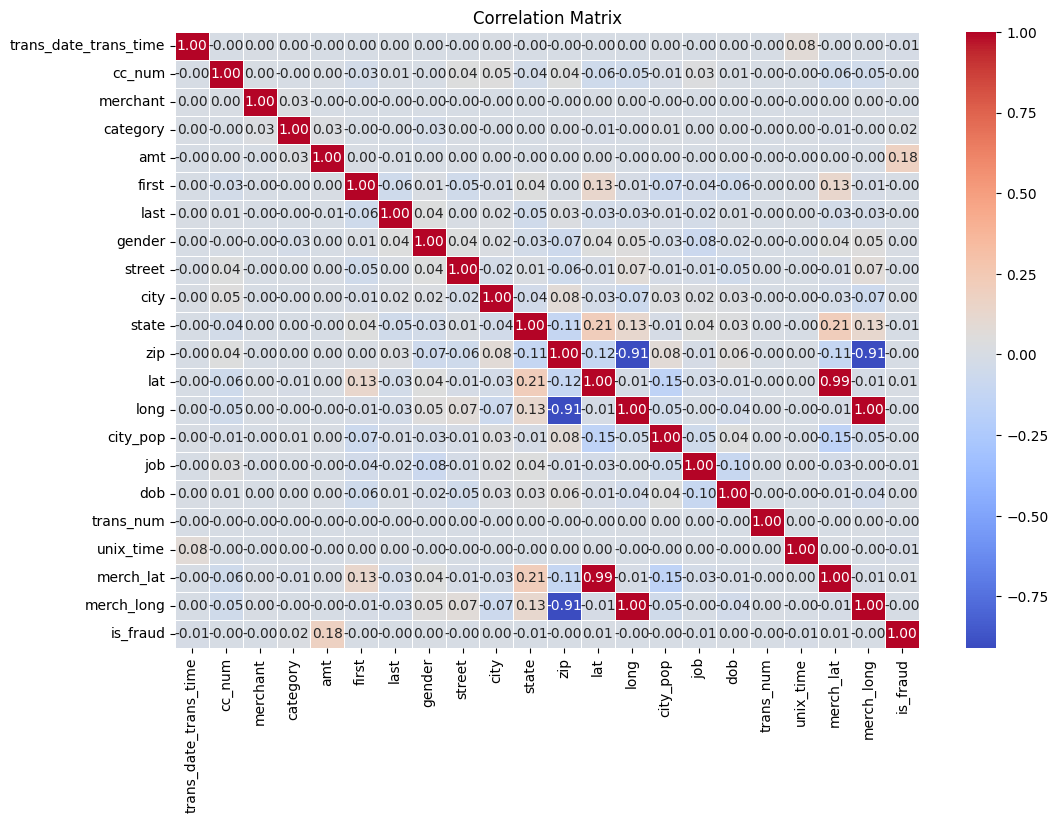

In [9]:
# Visualization 2: Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Split data into fraudulent and legitimate transactions
fraud_mask = y_train == 1
legit_mask = y_train == 0

fraud_X = X_train[fraud_mask]  # All fraudulent transactions in training set
legit_X = X_train[legit_mask]  # All legitimate transactions in training set

# Get the number of samples in each class
n_fraud = len(fraud_X)
n_legit = len(legit_X)

# Determine target size for balanced dataset
target_size = min(n_fraud, n_legit)

# Sample from both classes to get balanced dataset
if n_fraud > target_size:
    fraud_sample = fraud_X.sample(n=target_size, random_state=42)
else:
    fraud_sample = fraud_X
    
if n_legit > target_size:
    legit_sample = legit_X.sample(n=target_size, random_state=42)
else:
    legit_sample = legit_X

# Combine balanced datasets
X_train_balanced = pd.concat([legit_sample, fraud_sample])
y_train_balanced = pd.Series([0]*len(legit_sample) + [1]*len(fraud_sample))

# Shuffle the balanced dataset
balanced_idx = np.random.permutation(len(X_train_balanced))
X_train = X_train_balanced.iloc[balanced_idx].reset_index(drop=True)
y_train = y_train_balanced.iloc[balanced_idx].reset_index(drop=True)

newdata = X_train_balanced.copy()
newdata['is_fraud'] = y_train_balanced



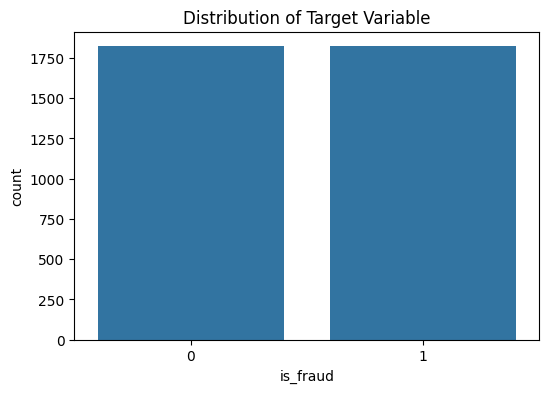

Number of fraudulent transactions (is_fraud = 1): 1823
Number of non-fraudulent transactions (is_fraud = 0): 1823


In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=newdata)  # Assuming the target column is named 'target'
plt.title('Distribution of Target Variable')
plt.show()
print("Number of fraudulent transactions (is_fraud = 1):", newdata['is_fraud'].value_counts().get(1, 0))
print("Number of non-fraudulent transactions (is_fraud = 0):", newdata['is_fraud'].value_counts().get(0, 0))

In [13]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(83358, 21)
(83358,)
(3646, 21)
(3646,)


In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [15]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Step 2: Define the logistic regression class
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=100000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Apply sigmoid function."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Train the logistic regression model."""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights
        self.bias = 0                       # Initialize bias

        # Gradient descent
        for _ in range(self.epochs):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid to get predictions
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """Make predictions."""
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        # Convert probabilities to binary output (0 or 1)
        y_predicted_binary = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_binary)

# Step 3: Train and evaluate the model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("count of fraudulent transactions (is_fraud = 1):", np.sum(y_pred == 1))
print("count of fraudulent transactions (is_fraud = 1):", np.sum(y_pred == 0))
print("count of fraudulent transactions (is_fraud = 1) in the test set:", y_test.value_counts().get(1, 0))
print("count of non-fraudulent transactions (is_fraud = 0) in the test set:", y_test.value_counts().get(0, 0))
# Step 4: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

count of fraudulent transactions (is_fraud = 1): 5950
count of fraudulent transactions (is_fraud = 1): 77408
count of fraudulent transactions (is_fraud = 1) in the test set: 322
count of non-fraudulent transactions (is_fraud = 0) in the test set: 83036
Model Performance:
Accuracy: 0.93
Precision: 0.04
Recall: 0.79
F1-Score: 0.08


In [16]:
import numpy as np
from collections import Counter

class KNearestNeighborsScratch:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        """
        Store the training data and labels.
        """
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
    
    def predict(self, X_test):
        """
        Predict the class for each test instance.
        """
        X_test = np.array(X_test)
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
    
    def _predict(self, x):
        """
        Predict the class for a single instance.
        """
        # Compute Euclidean distances
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        # Find the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

### k-Nearest Neighbors (k-NN): A Linear Algebra Perspective

1. **Overview**: 
   - k-NN is a non-parametric algorithm that classifies a data point based on the majority class among its \( k \)-nearest neighbors.
   - It relies on distance metrics to determine neighbors.

2. **Distance Calculation**:
   - The most common metric is the Euclidean distance:
     $$
     d(\mathbf{x}_i, \mathbf{x}_j) = \sqrt{\sum_{k=1}^n \left( x_{i,k} - x_{j,k} \right)^2}
     $$
   - In vector form:
     $$
     d(\mathbf{x}_i, \mathbf{x}_j) = \|\mathbf{x}_i - \mathbf{x}_j\|_2
     $$
   - Other metrics like Manhattan or cosine similarity can also be used.

3. **Algorithm Steps**:
   - Compute distances from the input point \( \mathbf{x} \) to all points in the dataset:
     $$
     D = \|\mathbf{X} - \mathbf{x}\|_2
     $$
     where \( \mathbf{X} \) is the matrix of all training points.
   - Sort the distances to find the \( k \)-nearest neighbors.
   - Determine the majority class among the neighbors.

4. **Linear Algebra Connection**:
   - **Matrix Representation**: Distance computation can be vectorized for efficiency. For all points:
     $$
     \|\mathbf{X} - \mathbf{x}\|_2 = \sqrt{\text{diag}(\mathbf{X} \mathbf{X}^\top) - 2\mathbf{X} \mathbf{x} + \|\mathbf{x}\|_2^2}
     $$
   - **Efficient Search**: Techniques like KD-trees or ball-trees leverage geometric properties to reduce complexity in high dimensions.

5. **Prediction**:
   - Assign the class based on a majority vote among the \( k \)-nearest neighbors.



In [17]:

k_values = [1, 3, 5, 7, 9]  # Different values of k to loop through
for k in k_values:
    knn = KNearestNeighborsScratch(k=k)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Model Performance for k={}:".format(k))
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")



Model Performance for k=1:
Accuracy: 0.80
Precision: 0.02
Recall: 0.97
F1-Score: 0.04
Model Performance for k=3:
Accuracy: 0.77
Precision: 0.02
Recall: 0.97
F1-Score: 0.03
Model Performance for k=5:
Accuracy: 0.76
Precision: 0.02
Recall: 0.98
F1-Score: 0.03
Model Performance for k=7:
Accuracy: 0.76
Precision: 0.02
Recall: 0.97
F1-Score: 0.03
Model Performance for k=9:
Accuracy: 0.76
Precision: 0.02
Recall: 0.94
F1-Score: 0.03


In [18]:
class SVM:
    def __init__(self, learning_rate=0.0001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)



In [19]:
print(X_train.shape)
print(y_train.shape)

(3646, 21)
(3646,)


In [1]:
# Apply SVD reduction using sklearn
from sklearn.decomposition import TruncatedSVD

# Initialize SVD with 2 components for visualization
svd = TruncatedSVD(n_components=3, random_state=42)

# Fit and transform the training data, transform the test data
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

# Plot the reduced data
plt.figure(figsize=(12, 5))

# Training data plot
plt.subplot(121)
plt.scatter(X_train_reduced[y_train == 0, 0], X_train_reduced[y_train == 0, 1], 
           c='blue', label='Non-Fraud', alpha=0.5)
plt.scatter(X_train_reduced[y_train == 1, 0], X_train_reduced[y_train == 1, 1], 
           c='red', label='Fraud', alpha=0.5)
plt.title('SVD Reduced Training Data')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.legend()

# Test data plot  
plt.subplot(122)
plt.scatter(X_test_reduced[y_test == 0, 0], X_test_reduced[y_test == 0, 1],
           c='blue', label='Non-Fraud', alpha=0.5)
plt.scatter(X_test_reduced[y_test == 1, 0], X_test_reduced[y_test == 1, 1],
           c='red', label='Fraud', alpha=0.5)
plt.title('SVD Reduced Test Data')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.legend()

plt.tight_layout()
plt.show()

# Print reduction results and explained variance
print("\nSVD Reduction Results:")
print(f"Original training data shape: {X_train.shape}")
print(f"Reduced training data shape: {X_train_reduced.shape}")
print(f"Original test data shape: {X_test.shape}")
print(f"Reduced test data shape: {X_test_reduced.shape}")
print(f"\nExplained variance ratio: {svd.explained_variance_ratio_}")
print(f"Total explained variance: {svd.explained_variance_ratio_.sum():.4f}")

# Plot explained variance ratio
plt.figure(figsize=(12, 5))

# Cumulative explained variance plot
plt.subplot(121)
cumulative_variance_ratio = np.cumsum(svd.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of Components')
plt.grid(True)

# Individual explained variance plot
plt.subplot(122)
plt.bar(range(1, len(svd.explained_variance_ratio_) + 1), svd.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Component')
plt.grid(True)

plt.tight_layout()
plt.show()




NameError: name 'X_train' is not defined


Highly correlated feature pairs (correlation > 0.8):
Features 11 and 13: correlation = 0.911
Features 11 and 20: correlation = 0.910
Features 12 and 19: correlation = 0.993
Features 13 and 20: correlation = 0.999

Correlation Filter Results:
Original feature dimension: 21
Reduced feature dimension: 18
Number of features removed: 3

Comparison of reduced dimensions:
Correlation Filter shape: (3646, 18)
SVD shape: (3646, 9)
PCA shape: (3646, 21)


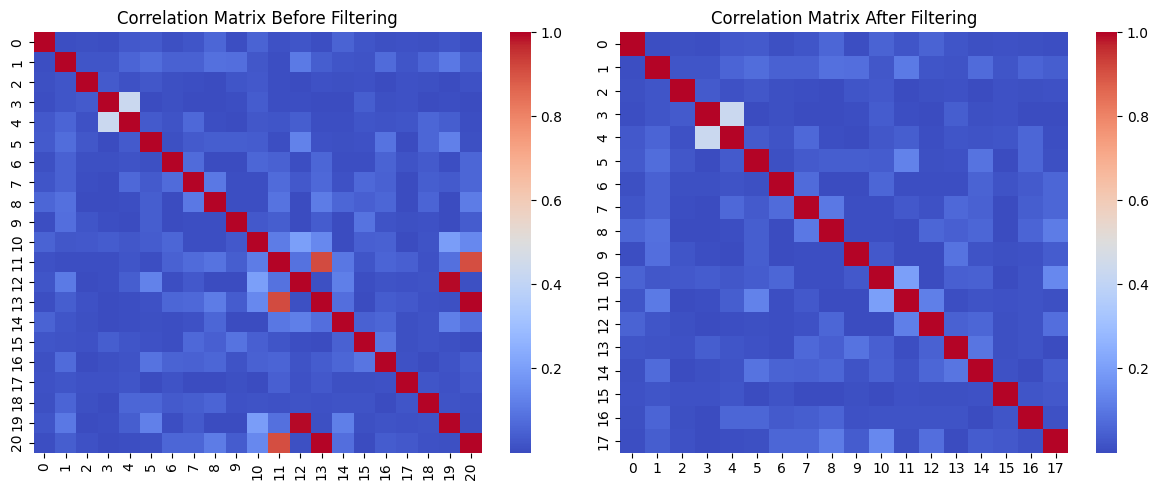

In [22]:
# Feature selection using correlation filter method
class CorrelationFilter:
    def __init__(self, threshold=0.8):
        self.threshold = threshold
        self.keep_mask = None
        
    def fit_transform(self, X):
        # Calculate correlation matrix
        corr_matrix = np.abs(np.corrcoef(X.T))
        
        # Get upper triangle indices (excluding diagonal)
        upper_tri = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        
        # Find features with correlation greater than threshold
        high_corr_pairs = np.where(np.abs(corr_matrix[upper_tri]) > self.threshold)
        
        # Convert to original matrix indices and store correlated pairs
        correlated_pairs = []
        upper_tri_coords = np.triu_indices(corr_matrix.shape[0], k=1)
        for idx in range(len(high_corr_pairs[0])):
            i = upper_tri_coords[0][high_corr_pairs[0][idx]]
            j = upper_tri_coords[1][high_corr_pairs[0][idx]]
            correlation = corr_matrix[i,j]
            correlated_pairs.append((i, j, correlation))
        
        # Print highly correlated feature pairs
        print("\nHighly correlated feature pairs (correlation > {}):".format(self.threshold))
        for i, j, corr in correlated_pairs:
            print(f"Features {i} and {j}: correlation = {corr:.3f}")
        
        # For each group of correlated features, keep only one feature
        features_to_remove = set()
        processed_features = set()
        
        for i, j, _ in correlated_pairs:
            if i not in processed_features and j not in processed_features:
                # Keep feature i, remove feature j
                features_to_remove.add(j)
                processed_features.add(i)
                processed_features.add(j)
            elif i not in processed_features:
                features_to_remove.add(j)
                processed_features.add(i)
                processed_features.add(j)
            elif j not in processed_features:
                features_to_remove.add(i)
                processed_features.add(i)
                processed_features.add(j)
        
        # Create mask for features to keep
        self.keep_mask = np.ones(X.shape[1], dtype=bool)
        self.keep_mask[list(features_to_remove)] = False
        
        # Return filtered data
        return X[:, self.keep_mask]
        
    def transform(self, X):
        return X[:, self.keep_mask]

# Apply correlation filter to training data
# Initialize and apply correlation filter
corr_filter = CorrelationFilter(threshold=0.8)
X_train_corr = corr_filter.fit_transform(X_train)
X_test_corr = corr_filter.transform(X_test)

print("\nCorrelation Filter Results:")
print(f"Original feature dimension: {X_train.shape[1]}")
print(f"Reduced feature dimension: {X_train_corr.shape[1]}")
print(f"Number of features removed: {X_train.shape[1] - X_train_corr.shape[1]}")

# Compare dimensions with other reduction methods
print("\nComparison of reduced dimensions:")
print(f"Correlation Filter shape: {X_train_corr.shape}")
print(f"SVD shape: {X_train_svd.shape}")
print(f"PCA shape: {X_train.shape}")

# Visualize correlation matrix before and after filtering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(np.abs(np.corrcoef(X_train.T)), cmap='coolwarm')
plt.title('Correlation Matrix Before Filtering')

plt.subplot(1, 2, 2)
sns.heatmap(np.abs(np.corrcoef(X_train_corr.T)), cmap='coolwarm')
plt.title('Correlation Matrix After Filtering')

plt.tight_layout()
plt.show()


In [25]:
# Import XGBoost
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create and train XGBoost model
print("\nTraining XGBoost model...")
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)

# Train on correlation filtered data
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]


# Print accuracy score
print("\nXGBoost Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")




Training XGBoost model...

XGBoost Model Performance:
Accuracy: 0.9615
